# Evaluation Project - 8
# Flight Price Prediction

# ------------------------------------------------------------------------------------------------------

### Problem Statement:

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.Airlines use complex algorithms to calculate flight prices given the various conditions present at that particular time. These methods take into account financial, marketing and various social factors to predict flight prices.


### Size of training set: 10683 records

### Size of test set: 2671 records

### You have to use your skills as a data scientist and build a machine learning model to predict the price of the flight ticket. 

### Nowadays, the number of people using flights has increased significantly. It is difficult for airlines to hold prices as prices change dynamically due to different conditions.That’s why we will try to use machine learning to solve this problem. This can help airlines by predicting what prices they can maintain. It can also help customers to predict future flight prices and plan their journey accordingly
### We have 2 datasets here — training set and test set.

### The training set contains the features, along with the prices of the flights. It contains 10683 records, 10 input features and 1 output column — ‘Price’.

### The test set contains 2671 records and 10 input features. The output ‘Price’ column needs to be predicted in this set. We will use Regression techniques here, since the predicted output will be a continuous value.

## FEATURES:
Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

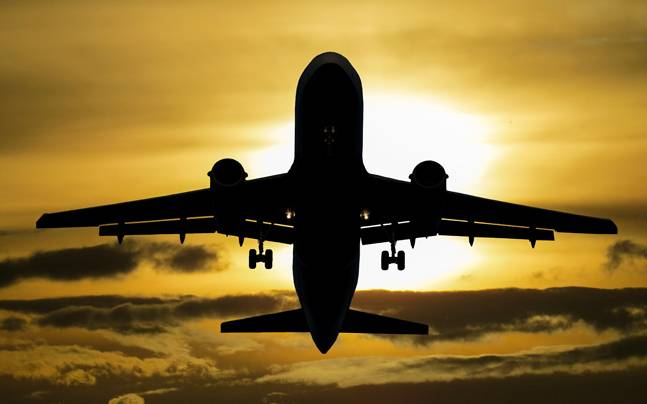

# Importing useful Libraries:

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset:

In [6]:
train_data = pd.read_excel("F:/Flight_Ticket_Participant_Datasets/Data_Train.xlsx")

### Since data is in the form of excel file we have to use pd.read_excel to load the data.

In [7]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [8]:
#Dataset Information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Exploratory Data Analysis :

In [9]:
# Checking the dimension of dataset 
train_data.shape

(10683, 11)

In [10]:
# Checking the type of dataset
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

#### All features columns have object datatype while target cloumn "price"  have integer datatype.

## feature analysis:

The columns Date_of_Journey, Dept_Time and Arrival_Time showing object data type which means python is not able to understand the type of data in this column.

Therefore, we have to convert this datatype into timestamp to use them properly for prediction.

In [11]:
# Converting Date and Time columns from object type to Datetime Type
train_data['Date_of_Journey']=pd.to_datetime(train_data['Date_of_Journey'])
train_data['Dep_Time']=pd.to_datetime(train_data['Dep_Time'])
train_data['Arrival_Time']=pd.to_datetime(train_data['Arrival_Time'])

In [12]:
# Again checking the type of dataset
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

#### First will split Date_of_Journey into Month and day, since the dataset contains only 2019 year data so no need to take year column.

In [13]:
# Extracting Day from Date_of_Journey column
train_data["Journey_Day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

# Extracting Month from Date_of_Journey column
train_data["Journey_Month"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.month

In [14]:
# Now we will remove Date of Journey 
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [15]:
# Now check the details of our Duration
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

#### Thus, we can note that short legth fights were more in number compared to long duration fights

In [16]:
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [17]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-08-19 13:15:00,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-08-19 23:30:00,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-08-19 21:35:00,4h 45m,1 stop,No info,13302,3,1,16,50


In [18]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

## Time taken by plane to reach destination

In [19]:
# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

In [20]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [21]:
# Now we can Drop Duration column
train_data.drop("Duration",axis=1,inplace=True)

In [22]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [23]:
# Checking the value counts of each columns
for i in train_data.columns:
        print(train_data[i].value_counts())
        print('-------------------------------------------')

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
-------------------------------------------
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64
-------------------------------------------
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64
-------------------------------------------
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR         

#### From the above value counts we can observe that some repeated categories in some features. Let's replace them.

In [24]:
# Replacing "Jet Airways Business" as "Jet Airways" in the column Airline
train_data["Airline"] = train_data["Airline"].replace("Jet Airways Business","Jet Airways")

# Replacing "Multiple carriers Premium economy" as "Multiple carriers" in Airline column
train_data["Airline"] = train_data["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

# Replacing "Vistara Premium economy" as "Vistara" in Airline column
train_data["Airline"] = train_data["Airline"].replace("Vistara Premium economy","Vistara")

# Replacing "New Delhi" as "Delhi" in Destination column
train_data["Destination"] = train_data["Destination"].replace("New Delhi","Delhi")

# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
train_data["Additional_Info"] = train_data["Additional_Info"].replace("No info","No Info")

In [25]:
# Checking null values in the dataframe
train_data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Total_Stops        1
Additional_Info    0
Price              0
Journey_Day        0
Journey_Month      0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
Duration_hours     0
Duration_mins      0
dtype: int64

#### We can find missing values in Route and Total_Stops column. We can directly use dropna method but these two columns have categorical data so we can fill the null values using mode method.

In [26]:
# Filling missing values in Route by its mode DEL → BOM → COK
train_data["Route"] = train_data["Route"].fillna(train_data["Route"].mode()[0])

# Filling missing values in Total_Stops by its mode 1 stop
train_data["Total_Stops"] = train_data["Total_Stops"].fillna(train_data["Total_Stops"].mode()[0])

<AxesSubplot:>

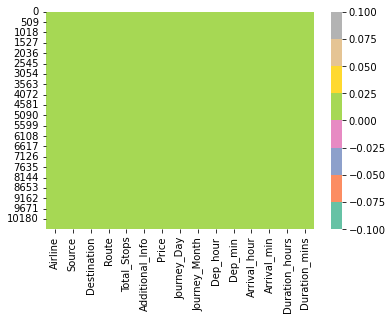

In [28]:
# Let's visualize the null values clearly
sns.heatmap(train_data.isnull(), cmap="Set2")

#### we have removed the null values from our dataset.

In [30]:
#Let us Check and remove any duplicate data is available
train_data.drop_duplicates(inplace=True)

In [31]:
train_data.shape

(10461, 15)

In [32]:
10681-10461

220

####  a total of 220 records were removed as they are duplicate..

In [33]:
# Checking whether the dataset contains any space
train_data.loc[train_data['Price']==" "]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins


### so there is no space in our dataset

##  Dataset description:

In [35]:
# Statistical summary of dataset
train_data.describe()

,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000,10461.000000
mean,9027.212504,12.629194,5.535130,12.476341,24.408278,13.389638,24.723258,10.028965,28.207150
std,4624.861032,8.791165,2.995285,5.726072,18.817167,6.853854,16.569495,8.378648,16.877554
min,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5224.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,8266.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,12346.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


### observation:
1.we earlier removed null values from our data now or data is perfect

2.There is a high data variance of data in our Label, it varies from 1759 to 79512,

3.The mean value is greater than the median(50%) in the columns Price, Journey_Day, Duration_hours and Dep_Hour so we can say they are skewed to right.

4.The median(50%) is bit greater than mean in Duration_mins, Dep_Min, Arrival_Hour and Arrival_Min which means they are skewed to left.

5.From this we can also interpret some outliers were present in our data

# Data Visualization:

In [36]:
# checking for categorical columns
categorical_col=[]
for i in train_data.dtypes.index:
    if train_data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [37]:
# Now checking for numerical columns
numerical_col=[]
for i in train_data.dtypes.index:
    if train_data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Price', 'Journey_Day', 'Journey_Month', 'Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours', 'Duration_mins']


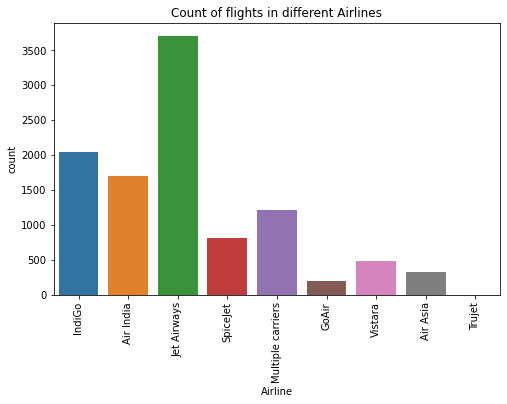

In [38]:
# Plotting categorical columns
# Visualizing the various Airlines present in the dataset
plt.figure(figsize=(8,5))
sns.countplot(train_data["Airline"])
plt.title("Count of flights in different Airlines")
plt.xticks(rotation=90)
plt.show()

### The Jet Airways have maximum count then INDIGO

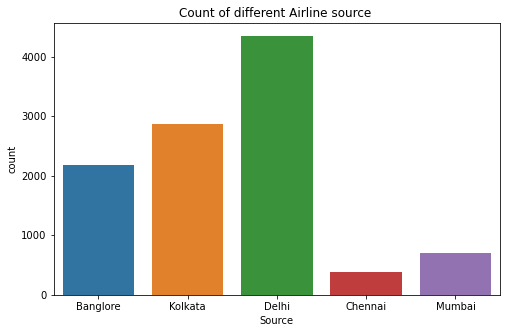

In [40]:
# Visualizing the source , Starting point
plt.figure(figsize=(8,5))
sns.countplot(train_data["Source"])
plt.title("Count of different Airline source ")
plt.show()


### Maximum Peoples are from Delhi then kolkata followed by banglore

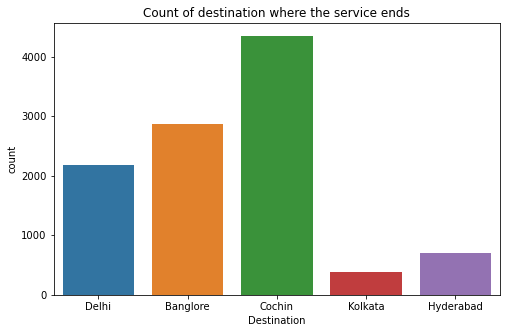

In [42]:
# Visualizing the destination where the service ends 
plt.figure(figsize=(8,5))
sns.countplot(train_data["Destination"])
plt.title("Count of destination where the service ends")
plt.show()

#### More peoples were traveling to Cochin, followed by Banglore, Delhi...

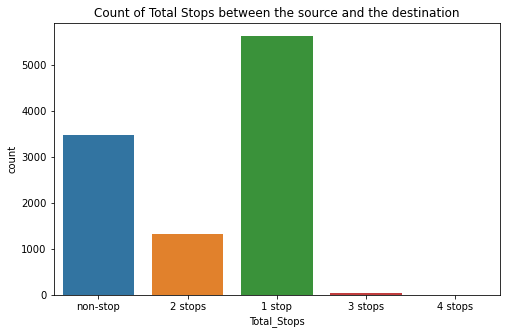

In [43]:
# Visualizing the Total Stops between the source and the destination
plt.figure(figsize=(8,5))
sns.countplot(train_data["Total_Stops"])
plt.title("Count of Total Stops between the source and the destination")
plt.show()

### most flight were having 1 stop in between them, and non stop flights are in second spot..

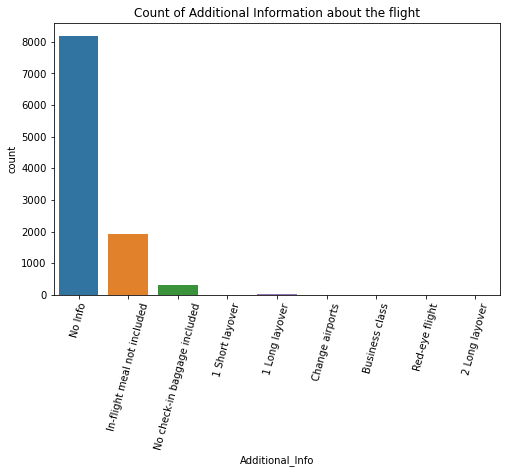

In [44]:
# Visualizing the Additional Information about the flight
plt.figure(figsize=(8,5))
sns.countplot(train_data["Additional_Info"])
plt.title("Count of Additional Information about the flight")
plt.xticks(rotation=75)
plt.show()

## BBivariate Analysis:

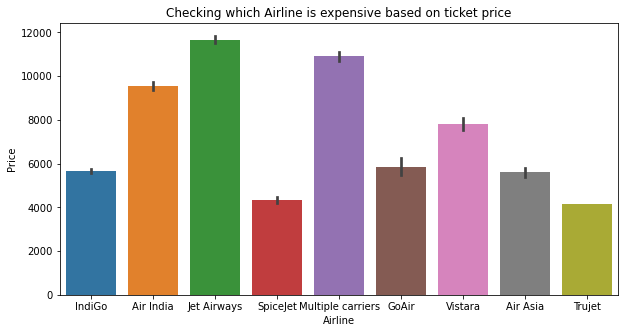

In [48]:
# Let's check which Airline is expensive based on Price of tickets

plt.figure(figsize=(10,5))
sns.barplot(train_data["Airline"],train_data["Price"])
plt.title("Checking which Airline is expensive based on ticket price")
plt.show()

#### Jet Airways have Maximum price rangefollwed by Multiple Carriers and Air India and low for Spiceject and Trujet

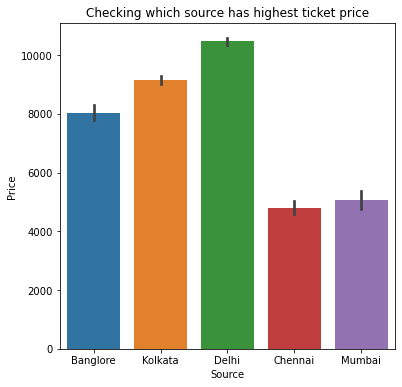

In [49]:
# Let's check the ticket prices in different sources

plt.figure(figsize=(6,6))
sns.barplot(x=train_data["Source"],y=train_data["Price"])
plt.title("Checking which source has highest ticket price")
plt.show()

#### we noticed earlier number of passengers were high in Delhi, similarly in price also Delhi have high price range follwed by Kolkota, Banglore

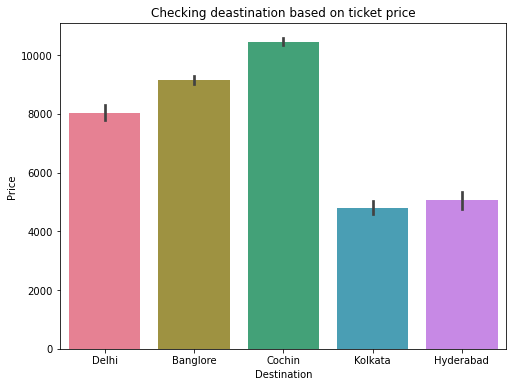

In [50]:
# Let's check how prices changes in each destination 

plt.figure(figsize=(8,6))
sns.barplot(train_data["Destination"],train_data["Price"],palette="husl" )
plt.title("Checking deastination based on ticket price")
plt.show()

### we noticed numers Cochin, Banglore and Delhi have maximum price Range, may be beacuse flight distance between palces

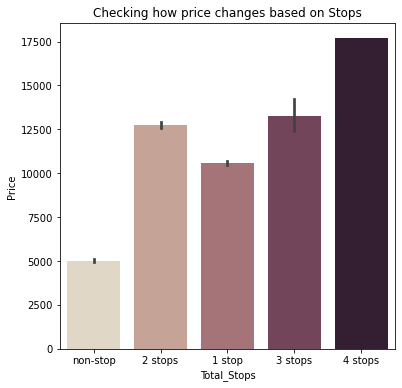

In [51]:
# Let's check the price vs total stops

plt.figure(figsize=(6,6))
sns.barplot(train_data["Total_Stops"],train_data["Price"],palette="ch:.28")
plt.title("Checking how price changes based on Stops")
plt.show()

#### This means that may be four stops may have long distances, so the fare may increase, Non stop Flights have lower rate....

<AxesSubplot:xlabel='Journey_Month', ylabel='Price'>

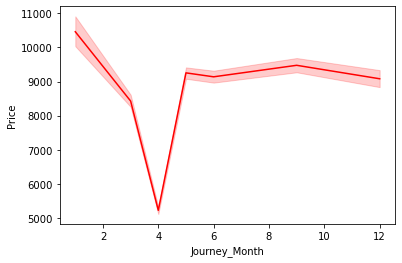

In [53]:
# Checking relation between Journey_Month and Price
sns.lineplot(x='Journey_Month',y='Price',data=train_data,color="r")

#### From this we can identify that , during January and February the rate is High, March and May the rates are low,again after jun the rate increase high...

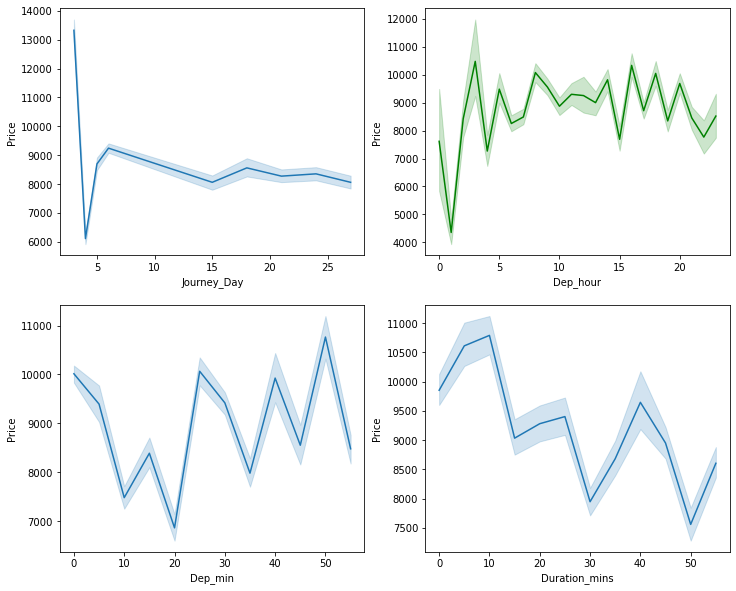

In [54]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking relation between Journey_Day and Price
sns.lineplot(x='Journey_Day',y='Price',ax=axes[0,0],data=train_data)

# Checking relation between Journey_Month and Price
sns.lineplot(x='Dep_hour',y='Price',ax=axes[0,1],data=train_data,color="g")

# Checking relation between Dep_Min and Price
sns.lineplot(x='Dep_min',y='Price',ax=axes[1,0],data=train_data)

# Checking relation between Duration_mins and Price
sns.lineplot(x='Duration_mins',y='Price',ax=axes[1,1],data=train_data,palette="coolwarm")
plt.show()

#### From the above graph we can identyfy that starting of mongth the price is high, but for only for 1st or 2nd , on from 3rd to fith there is a steep decline in fare, after from 8th onwards the price is not variying much.

#### From Second graph we can nte that during mid the price is little low, from moring 4 the price starting to increase and from 5 to 6 have maximum rate then it continues a flextuating pattern

#### Dep min will not have mcuh effects, Accoring to duration the price varying, as the duration is less price icreases, let us plot duration hour for more details

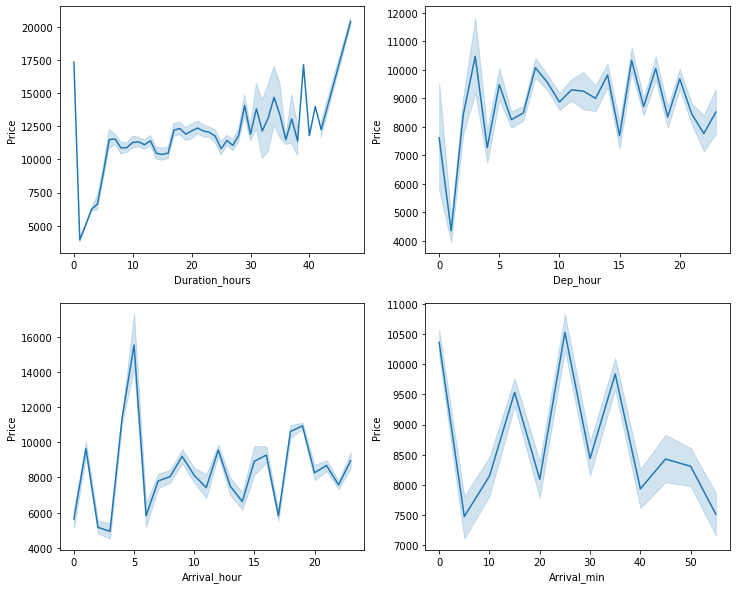

In [55]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Checking relation between Duration_hours and Price
sns.lineplot(x='Duration_hours',y='Price',ax=axes[0,0],data=train_data,palette="husl")

# Checking relation between Dep_Hour and Price
sns.lineplot(x='Dep_hour',y='Price',ax=axes[0,1],data=train_data,palette="bright")

# Checking relation between Arrival_Hour and Price
sns.lineplot(x='Arrival_hour',y='Price',ax=axes[1,0],data=train_data, palette="ch:.28")

# Checking relation between Arriva_Mins and Price
sns.lineplot(x='Arrival_min',y='Price',ax=axes[1,1],data=train_data,palette="coolwarm")
plt.show()

### we can notice as duration increases the rate is also increasing, Remaining coloumns does not have much influence in price hike

## MULTIVARIENT PLOT

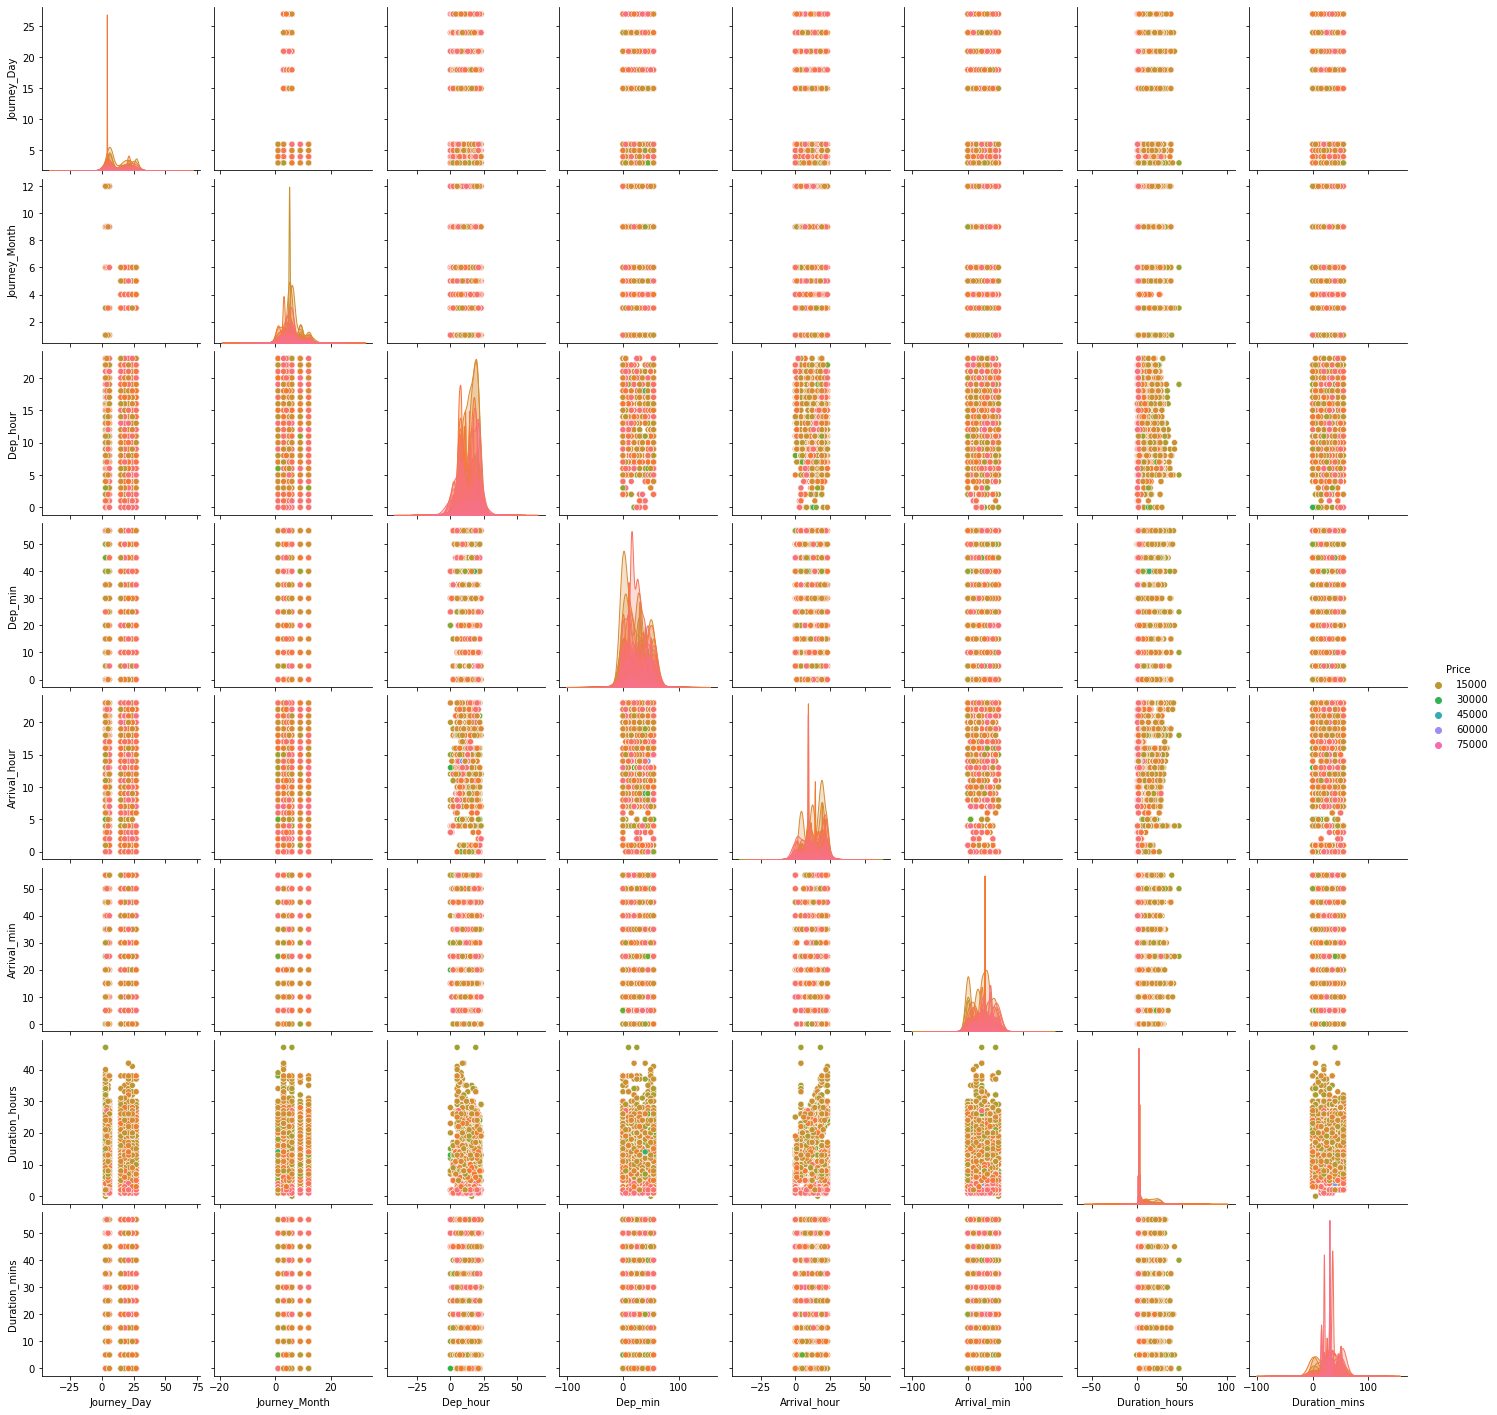

In [57]:
# Now let us plot pairwise relation between the features
sns.pairplot(train_data,hue="Price",palette="husl")
plt.show()

#### This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "Price". Here we can observe the relation between the features and label. Here we can observe the correaltion between the features and on the diagonal we cna notice hte distribution plot which shows whether the column has skewness or not. We can notice the linear relation between the features.

## Identifying the outliers using boxplot:

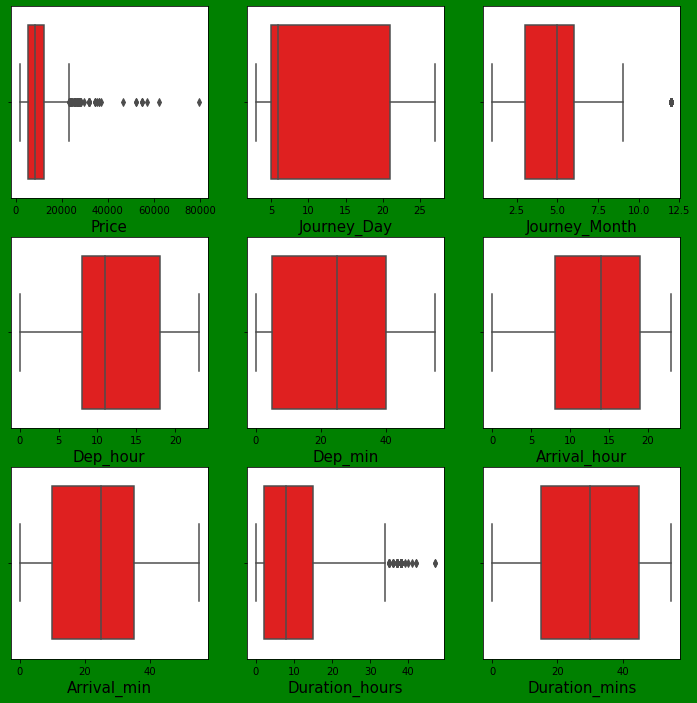

In [58]:
plt.figure(figsize=(12,12),facecolor='g')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(train_data[column],color="red")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1

### we can identify that For Price , Journey_Month, Duration Hours have outliers, So that we can remove outliers except Price as it is Label...

## Zscore method to remove outliers:

In [59]:
# Feature containing outliers
feature = train_data[['Duration_hours','Journey_Month']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature))

z

,Duration_hours,Journey_Month
0,0.958311,0.846414
1,0.361527,1.514162
2,1.070753,1.156830
3,0.600241,2.158452
4,0.719597,1.514162
...,...,...
10678,0.958311,1.156830
10679,0.958311,0.512540
10680,0.838954,0.512540
10681,0.958311,1.514162


In [60]:
# Creating new dataframe
new_train_df = train_data[(z<3).all(axis=1)] 
new_train_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No Info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No Info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No Info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No Info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No Info,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No Info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No Info,7229,27,4,8,20,11,20,3,0
10681,Vistara,Banglore,Delhi,BLR → DEL,non-stop,No Info,12648,3,1,11,30,14,10,2,40


In [61]:
#Percentage of data loss
(10461-10401)/10461*100

0.5735589331803843

### only 0.57 % is data loss which is affordable.

# Checking skewness:

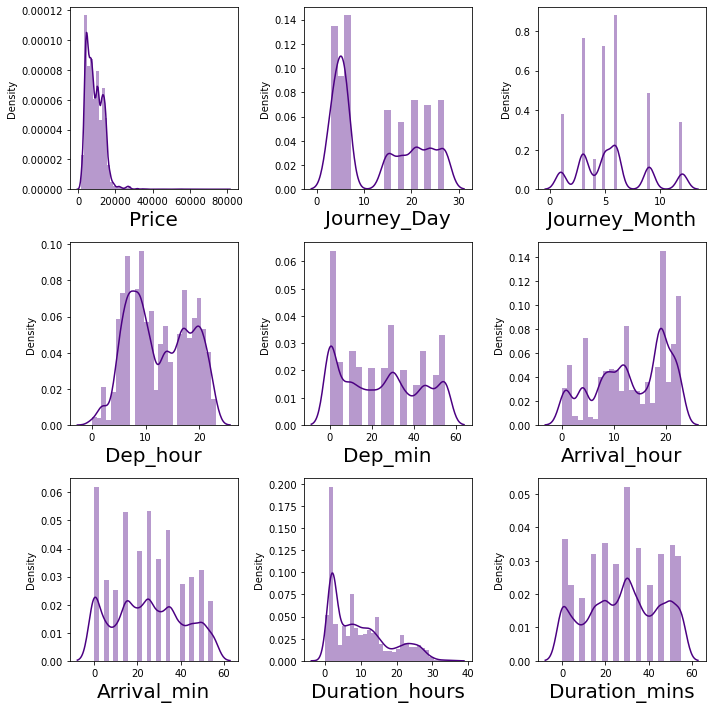

In [62]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(new_train_df[column],color="indigo")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [63]:
# Checking the skewness
new_train_df.skew()

Price             1.868617
Journey_Day       0.376112
Journey_Month     0.629226
Dep_hour          0.100056
Dep_min           0.168851
Arrival_hour     -0.371007
Arrival_min       0.107701
Duration_hours    0.802154
Duration_mins    -0.091555
dtype: float64

### We can find that in columns Price, Journey_Month and Duration_hours have skewness but as price is our Label we no need to remove .Will remove skewness only from Duration_hours and Journey_Month.

## Removing skewness using log transformation:

In [64]:
new_train_df["Duration_hours"] = np.log1p(new_train_df["Duration_hours"])
new_train_df["Journey_Month"] = np.log1p(new_train_df["Journey_Month"])

In [65]:
new_train_df.skew()

Price             1.868617
Journey_Day       0.376112
Journey_Month    -0.529623
Dep_hour          0.100056
Dep_min           0.168851
Arrival_hour     -0.371007
Arrival_min       0.107701
Duration_hours   -0.086468
Duration_mins    -0.091555
dtype: float64

#### skewness is now removed using log transformation.

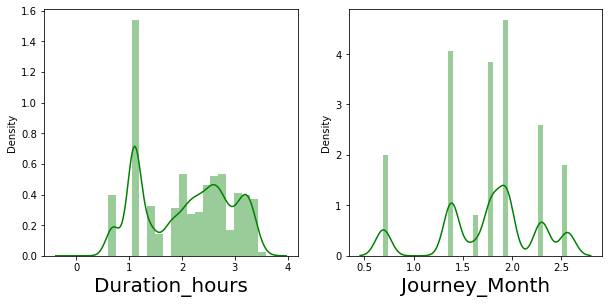

In [66]:
# Checking how the data has been distributed after removing the skewness
skew = ["Duration_hours","Journey_Month"]
plt.figure(figsize=(10,10), facecolor='white')
plotnumber = 1

for column in new_train_df[skew]:
    if plotnumber<=2:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(new_train_df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Encoding of categorical columns using label encoding method:

In [67]:
# checking for categorical columns
categorical_col=[]
for i in new_train_df.dtypes.index:
    if new_train_df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


In [68]:
categorical_col = ['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [69]:
# Encoding data using label encoding method
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_train_df[categorical_col]= new_train_df[categorical_col].apply(LE.fit_transform)
new_train_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,3,0,2,18,4,6,3897,24,1.386294,22,20,1,10,1.098612,50
1,1,3,0,84,1,6,7662,5,0.693147,5,50,13,15,2.079442,25
2,4,2,1,118,1,6,13882,6,2.302585,9,25,4,25,2.995732,0
3,3,3,0,91,0,6,6218,5,2.564949,18,5,23,30,1.791759,25
4,3,0,2,29,0,6,13302,3,0.693147,16,50,21,35,1.609438,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,64,4,6,4107,4,2.302585,19,55,22,25,1.098612,30
10679,1,3,0,64,4,6,4145,27,1.609438,20,45,23,20,1.098612,35
10680,4,0,2,18,4,6,7229,27,1.609438,8,20,11,20,1.386294,0
10681,8,0,2,18,4,6,12648,3,0.693147,11,30,14,10,1.098612,40


#### we have encoded all the catagorical , object type data in to numerical values...

## Correlation between the target variable and independent variables:

In [70]:
# Checking the correlation between features and the target
cor = new_train_df.corr()
cor

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Airline,1.000000,-0.012208,0.053594,0.023790,-0.011933,0.004289,0.026374,0.025872,0.004554,-0.023559,-0.073048,-0.002131,-0.089631,-0.072388,-0.048525
Source,-0.012208,1.000000,-0.433002,0.404319,-0.222762,0.009701,0.014049,0.007624,0.061866,0.061277,-0.055868,0.028016,0.021376,0.147012,-0.145541
Destination,0.053594,-0.433002,1.000000,-0.228475,0.509616,0.093624,-0.261680,0.008066,-0.062151,-0.090365,0.097386,-0.061321,0.007263,-0.495941,0.021798
Route,0.023790,0.404319,-0.228475,1.000000,-0.437214,0.037400,0.153397,0.094109,0.074055,-0.069968,-0.069960,0.018835,-0.175621,0.370625,-0.238913
Total_Stops,-0.011933,-0.222762,0.509616,-0.437214,1.000000,0.242501,-0.573087,0.045266,-0.047465,0.039159,0.049630,-0.098499,0.177884,-0.812808,0.184569
Additional_Info,0.004289,0.009701,0.093624,0.037400,0.242501,1.000000,-0.196529,0.019099,0.021615,-0.049315,0.004516,-0.025085,0.032449,-0.257359,0.060218
Price,0.026374,0.014049,-0.261680,0.153397,-0.573087,-0.196529,1.000000,-0.169742,-0.016950,0.009672,-0.025189,0.028104,-0.088608,0.601381,-0.129951
Journey_Day,0.025872,0.007624,0.008066,0.094109,0.045266,0.019099,-0.169742,1.000000,-0.098041,-0.007924,-0.014625,-0.000671,-0.020450,-0.049850,-0.008607
Journey_Month,0.004554,0.061866,-0.062151,0.074055,-0.047465,0.021615,-0.016950,-0.098041,1.000000,0.019809,-0.005319,-0.005084,-0.029157,0.060790,-0.026451
Dep_hour,-0.023559,0.061277,-0.090365,-0.069968,0.039159,-0.049315,0.009672,-0.007924,0.019809,1.000000,-0.016030,0.001989,0.073728,-0.002480,-0.024748


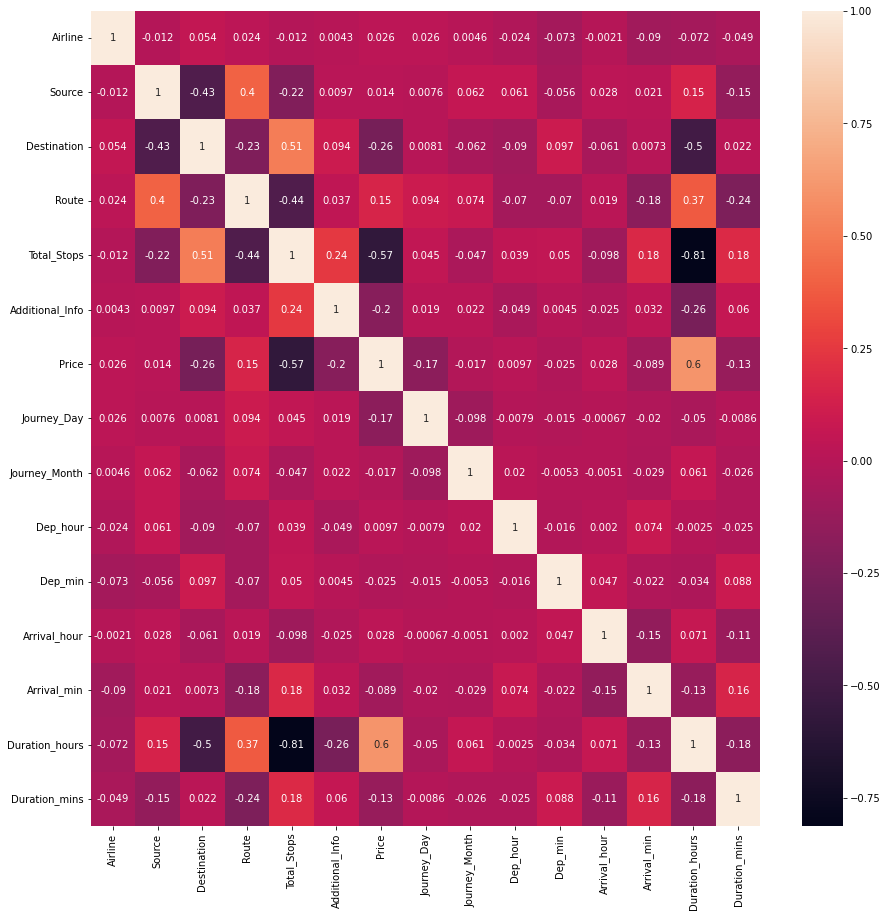

In [71]:
# Visualize Corelation between features
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True)
plt.show()

### OBSERVATION :
1.Only few coloumns were highly corelated, Total stops and Duration_hours negatevily co-related

2.The feature Duration_hours is highly positively correlated with the target variable Price.

3.The feature Total_Stops is highly negatively correlated with the label.

In [72]:
# Let us analysis the corealtion with LaBel and other features
cor['Price'].sort_values(ascending=False)

Price              1.000000
Duration_hours     0.601381
Route              0.153397
Arrival_hour       0.028104
Airline            0.026374
Source             0.014049
Dep_hour           0.009672
Journey_Month     -0.016950
Dep_min           -0.025189
Arrival_min       -0.088608
Duration_mins     -0.129951
Journey_Day       -0.169742
Additional_Info   -0.196529
Destination       -0.261680
Total_Stops       -0.573087
Name: Price, dtype: float64

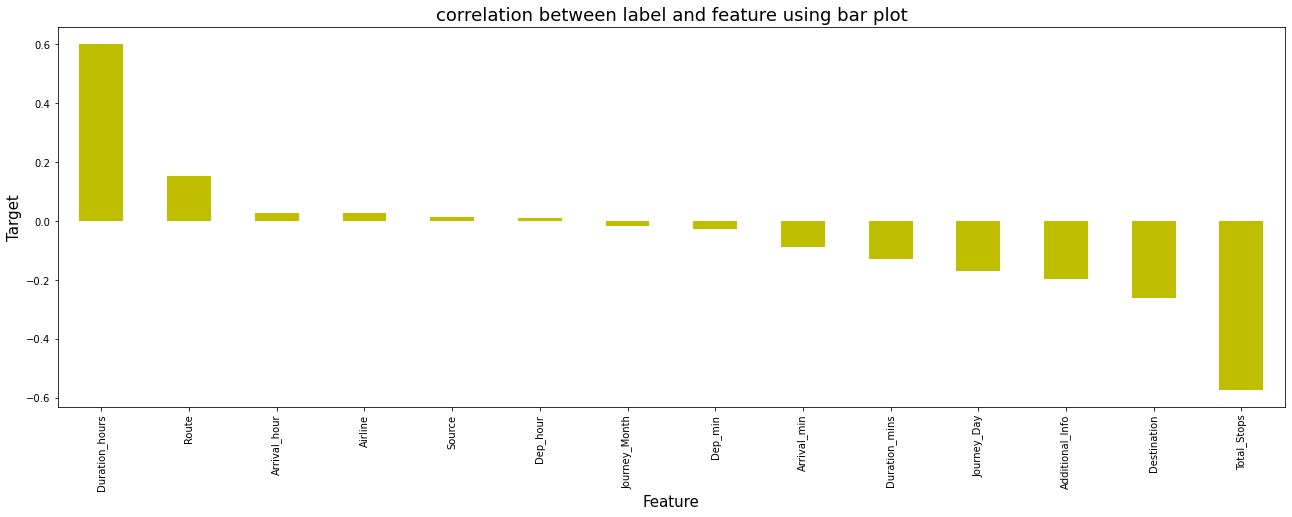

In [73]:
#Visualizing the correlation between label and features using bar plot
plt.figure(figsize=(22,7))
new_train_df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

### The features Journey_Month, Source,Arrival_Hour and Airline have very less correlation with the label so we can drop these columns if necessary

# Separating the feature and label into x and y:

In [74]:
x = new_train_df.drop("Price", axis=1)
y = new_train_df["Price"]

In [75]:

x.shape

(10401, 14)

In [77]:
# Dimension of x
y.shape

(10401,)

## Feature Scaling using Standard Scalarization:

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,-0.348183,-1.644201,0.802852,-1.530837,1.388798,0.327663,1.294132,-0.752275,1.658942,-0.234991,-1.802584,-0.887807,-1.169607,1.286957
1,-1.462820,0.880230,-1.149788,0.268723,-0.254160,0.327663,-0.868855,-2.136143,-1.314310,1.359532,-0.052511,-0.586237,0.011100,-0.194116
2,0.209135,0.038753,-0.173468,1.195769,-0.254160,0.327663,-0.755013,1.077099,-0.614721,0.030763,-1.365066,0.016904,1.114117,-1.675188
3,-0.348183,0.880230,-1.149788,0.459585,-0.801813,0.327663,-0.868855,1.600908,0.959353,-1.032252,1.405883,0.318474,-0.335207,-0.194116
4,-0.348183,-1.644201,0.802852,-1.230910,-0.801813,0.327663,-1.096538,-2.136143,0.609559,1.359532,1.114204,0.620044,-0.554683,0.990742
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10396,-2.020139,0.880230,-1.149788,-0.276598,1.388798,0.327663,-0.982696,1.077099,1.134250,1.625286,1.260043,0.016904,-1.169607,0.102099
10397,-1.462820,0.880230,-1.149788,-0.276598,1.388798,0.327663,1.635656,-0.306769,1.309148,1.093778,1.405883,-0.284667,-1.169607,0.398313
10398,0.209135,-1.644201,0.802852,-1.530837,1.388798,0.327663,1.635656,-0.306769,-0.789618,-0.234991,-0.344190,-0.284667,-0.823300,-1.675188
10399,2.438409,-1.644201,0.802852,-1.530837,1.388798,0.327663,-1.096538,-2.136143,-0.264927,0.296517,0.093328,-0.887807,-1.169607,0.694528


## Checking VIF:

In [79]:
# If any multiCollinearity exists between features::
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.038213,Airline
1,1.505403,Source
2,1.764733,Destination
3,1.585024,Route
4,3.444671,Total_Stops
5,1.115626,Additional_Info
6,1.033632,Journey_Day
7,1.022108,Journey_Month
8,1.034701,Dep_hour
9,1.031051,Dep_min


### we can notice that no much multicollinearity exists between the featues except total_stop and duration hour

## Model Building:

In [83]:
#Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor


In [84]:
#Creating new train test split at best Random State
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=7)

# Importing our Algorithms:

In [85]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Random Forest Regressor:

R2 score: 0.9129685284102703
MAE: 660.2138321279809
MSE: 1750728.4906667296
RMSE: 1323.1509704741668


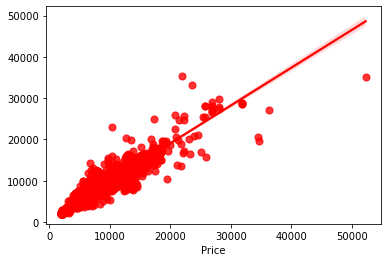

In [86]:
##Random Forest Regressor
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)

rfr=r2_score(y_test,predRFR)
print("R2 score:",rfr)
# Metric evaluation
print('MAE:',mean_absolute_error(y_test, predRFR))
print('MSE:',mean_squared_error(y_test, predRFR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predRFR)))

# Visualizing the predicteed values
sns.regplot(y_test,predRFR,scatter_kws={"s": 50},color='r')
plt.show()

## Accuracy of our Random Forest Regressor is 91.29%...

## Decision Tree Regressor:

R2 Score: 0.8849061216834097
MAE: 706.1493111182314
MSE: 2315232.963313041
RMSE: 1521.588960039156


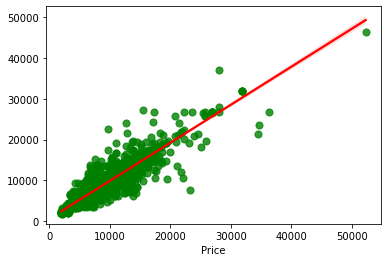

In [87]:

# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)

dtr=r2_score(y_test,predDTR)
print("R2 Score:",dtr)

# Metric evaluation
print('MAE:',mean_absolute_error(y_test, predDTR))
print('MSE:',mean_squared_error(y_test, predDTR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predDTR)))

# Visualizing the predicteed values
sns.regplot(y_test,predDTR,color="g",scatter_kws={"s":50},line_kws={'color':'r'})
plt.show()

## Accuracy of Decision Tree Regressor is 88.49%

## GradientBoosting Regressor:

R2_Score: 0.8229593870005973
MAE: 1238.7116851475957
MSE: 3561355.9040375133
RMSE: 1887.1555060560095


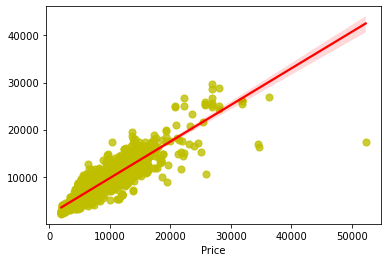

In [88]:
# Checking R2 score for GradientBoosting Regressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
gbr=r2_score(y_test,predGB)
print('R2_Score:',gbr)

# Metric Evaluation
print('MAE:',mean_absolute_error(y_test, predGB))
print('MSE:',mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predGB)))

# Visualizing the predicteed values
sns.regplot(y_test,predGB,color="y",scatter_kws={"s":50},line_kws={'color':'r'})
plt.show()

## Accuracy of GradientBoosting Regressor is 82.29%

## Bagging Regressor:

R2_Score: 0.9132205326565732
MAE: 678.3497760943533
MSE: 1745659.1633795707
RMSE: 1321.2339548238876


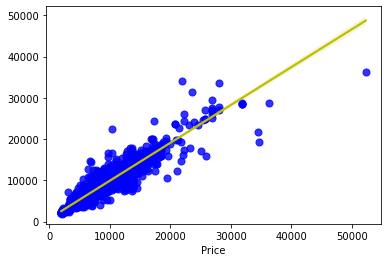

In [89]:
# Checking R2 score for BaggingRegressor

BR=BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
br=r2_score(y_test,predBR)
print('R2_Score:',br)

# Metric Evaluation
print('MAE:',mean_absolute_error(y_test, predBR))
print('MSE:',mean_squared_error(y_test, predBR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predBR)))

# Visualizing the predicteed values
sns.regplot(y_test,predBR,color="b",scatter_kws={"s":50},line_kws={'color':'y'})
plt.show()

## Accuracy of BaggingRegressor is 91.32%

## XGB Regressor:

R2_Score: 0.910231760285802
MAE: 745.4896971248197
MSE: 1805781.4254308555
RMSE: 1343.7936692181786


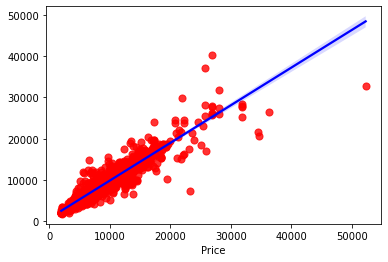

In [90]:
# Checking R2 score for XGB Regressor
from xgboost import XGBRegressor as xgb

XGB=xgb(verbosity=0)
XGB.fit(x_train,y_train)

# prediction
predXGB=XGB.predict(x_test)
xgb1=r2_score(y_test,predXGB)
print('R2_Score:',xgb1)

# Metric Evaluation
print('MAE:',mean_absolute_error(y_test, predXGB))
print('MSE:',mean_squared_error(y_test, predXGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predXGB)))

# Visualizing the predicteed values
sns.regplot(y_test,predXGB,color="r",scatter_kws={"s":50},line_kws={'color':'b'})
plt.show()

## The Accuracy of XGBoost Regressor is 91.02%..

# cross validation score:

In [91]:
# Checking cv score for Random Forest Regressor
rf_cv=cross_val_score(RFR,x,y,cv=5).mean()
print(rf_cv)

# Checking cv score for Decision Tree Regressor
dt_cv=cross_val_score(DTR,x,y,cv=5).mean()
print(dt_cv)

# Checking cv score for Gradient Boosting Regressor
gbr_cv=cross_val_score(GB,x,y,cv=5).mean()
print(gbr_cv)

# Checking cv score for Bagging Regressor
br_cv=cross_val_score(BR,x,y,cv=5).mean()
print(br_cv)

# Checking cv score for XGBRegressor
xgb_cv=cross_val_score(XGB,x,y,cv=5).mean()
print(xgb_cv)

0.8728712936763966
0.7835086353779765
0.8075308608110813
0.865788373632386
0.886767810502417


In [92]:
# Let us find the accuracy score and CVS of each Model
model_list=['Random Forest Regressor','Decision Tree Regressor','Gradient Boosting Regressor','Bagging Regressor','XGB Regressor']
accuracyscore=[rfr,dtr,gbr,br,xgb1]
crossval=[rf_cv,dt_cv,gbr_cv,br_cv,xgb_cv]
model_Acc=pd.DataFrame({})
model_Acc["Regression Model"]=model_list
model_Acc["Accuracy_score"]=accuracyscore
model_Acc["Cross Validation_Score"]=crossval
model_Acc

,Regression Model,Accuracy_score,Cross Validation_Score
0,Random Forest Regressor,0.912969,0.872871
1,Decision Tree Regressor,0.884906,0.783509
2,Gradient Boosting Regressor,0.822959,0.807531
3,Bagging Regressor,0.913221,0.865788
4,XGB Regressor,0.910232,0.886768


## we can easily identify that Gradient Boosting Regressor is best as difference between Cross valdidation score  and Accuracy Score is least

# Hyper parameter Tuning:

In [99]:
#Gradient Boosting Regressor Alogorithm

parameters = {'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile'],
             'n_estimators' : [50,100,200, 400],
              'learning_rate':[0.1,0.2,0.5,.6],
              'max_depth' : [4, 6, 8,10],
             }

GCV=GridSearchCV(GradientBoostingRegressor(),parameters,cv=5)

In [98]:
GCV.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
GCV.best_params_

## I tried hyper parameter tuning through gridsearchCv but it taking long long time .so i decided to go with result without hyperparameter tuning. 

In [102]:

Flight_Model=GradientBoostingRegressor(learning_rate=0.1, loss= 'huber', max_depth= 6, n_estimators= 400)
Flight_Model.fit(x_train, y_train)
pred = Flight_Model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred)))
print('MAE:',mean_absolute_error(y_test, pred))
print('MSE:',mean_squared_error(y_test, pred))

R2_Score: 90.9269795050364
RMSE value: 1350.9745947935712
MAE: 688.8868194624227
MSE: 1825132.3557776536


# Saving the model

In [104]:
# Saving the model using .pkl
import joblib
joblib.dump(Flight_Model,"FlightPrice.pkl")

['FlightPrice.pkl']

# Loading the  model

In [106]:
# Loading the saved model
Model=joblib.load("FlightPrice.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([ 7548.37554873,  5230.11527473,  2966.11147638, ...,
        4309.98391877, 10234.19226021,  5425.77996789])

In [107]:
df=pd.DataFrame({'Original Data':np.array(y_test),'Predicted Data':prediction})
df

,Original Data,Predicted Data
0,7229,7548.375549
1,10067,5230.115275
2,2754,2966.111476
3,3943,4873.255658
4,6838,6858.786871
...,...,...
3116,6528,6435.371186
3117,6934,6041.993221
3118,5073,4309.983919
3119,10262,10234.192260


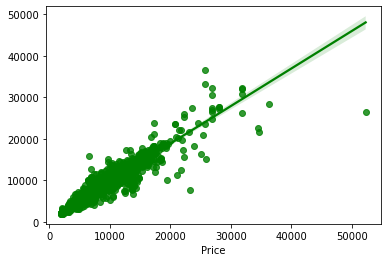

In [108]:
# Visualizing the predicteed values
sns.regplot(y_test,prediction,color="green")
plt.show()

### Almost all the predicted values are in same line. that means the prediction is almost same with original value

## Now let us process the test data given:

In [109]:
# Reading the excel file from dataset
test_df = pd.read_excel("F:/Flight_Ticket_Participant_Datasets/Test_set.xlsx")
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [110]:
test_df.shape

(2671, 10)

###  we have 2671 records  for prediction  of given dataset

### let us predict the flight price using the given dataset

In [111]:
# Checking the types of the dataset
test_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

### All the features are object type data...

# Feature Engineering:

### The columns Date_of_Journey, Dept_Time and Arrival_Time showing object data type, We can convert them to date type as done in train data

In [112]:
# Converting Date and Time columns from object type to Date Type
test_df['Date_of_Journey']=pd.to_datetime(test_df['Date_of_Journey'])
test_df['Dep_Time']=pd.to_datetime(test_df['Dep_Time'])
test_df['Arrival_Time']=pd.to_datetime(test_df['Arrival_Time'])

In [113]:
# Now let us check the data type
test_df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
dtype: object

####  we can see that the date type has been changed....

In [115]:
# Now we will splitt the day and month from the dates, as we know all data is of 2019 year doesnot have any relavance.

#Extracting Date
test_df['Journey_Day']=pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%y").dt.day
#Extracting Month
test_df['Jurney_Month']=pd.to_datetime(test_df.Date_of_Journey,format="%d/%m/%y").dt.month

In [116]:
#Now we can remove the Date _of_J0urney from our data
test_df.drop('Date_of_Journey',axis=1,inplace=True)

In [117]:
# Spliting Hours and Minutes
duration=list(test_df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2:# So columns contains on hour or minitues, so we are coverting in to same format
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m" # Adding minutes
        else:
            duration[i]= "0h " + duration[i]# Additing Hour

In [118]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [120]:

# Creating new features Hours and Minutes, and adding seperated data

test_df["Duration_hours"] = duration_hours
test_df["Duration_mins"] = duration_mins

# Dropping Duration column
test_df.drop("Duration",axis=1,inplace=True)

In [121]:
# Departure time means the time when the journey starts from the source.

# Extracting Hours from Dep_Time column
test_df["Dep_Hour"] = pd.to_datetime(test_df["Dep_Time"]).dt.hour

# Extracting Minutes from Dep_Time column
test_df["Dep_Min"] = pd.to_datetime(test_df["Dep_Time"]).dt.minute

### here we have extracted hour and minute from Dep_Time column so we can drop this column as it is of no use.

In [123]:
# Dropping Dep_Time column
test_df.drop("Dep_Time",axis=1,inplace=True)

In [124]:
#Simillarly we can extract hours and minutes from Arrival_Time column and accordingly dropping Arrival_time column.
# Extracting hour from Arrival_Time
test_df["Arrival_Hour"] = pd.to_datetime(test_df["Arrival_Time"]).dt.hour

# Extracting Minutes from Arrival_Time column
test_df["Arrival_Min"] = pd.to_datetime(test_df["Arrival_Time"]).dt.minute

# Dropping Arrival_Time column
test_df.drop("Arrival_Time",axis=1,inplace=True)

In [125]:
# Checking dataset again
test_df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Jurney_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,5,12,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,50,23,55,2,45


In [126]:
# Checking the value counts of each feature
for i in test_df.columns:
        print(test_df[i].value_counts())
        print('*********---------------***************')

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64
*********---------------***************
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64
*********---------------***************
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
*********---------------***************
DEL → BOM → COK                624
BLR → DEL                      389
CCU → BOM → BLR                253
CCU → BLR                      172
BOM → HYD

In [127]:
# As we done in training data , we can convert duplicate items or similar ine to same coloumn
# Replacing "Jet Airways Business" as "Jet Airways" in the column Airline
test_df["Airline"] = test_df["Airline"].replace("Jet Airways Business","Jet Airways")

# Replacing "Multiple carriers Premium economy" as "Multiple carriers" in Airline column
test_df["Airline"] = test_df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

# Replacing "Vistara Premium economy" as "Vistara" in Airline column
test_df["Airline"] = test_df["Airline"].replace("Vistara Premium economy","Vistara")

# Replacing "New Delhi" as "Delhi" in Destination column
test_df["Destination"] = test_df["Destination"].replace("New Delhi","Delhi")

# In the column Additional Info, "No Info" and "No info" are one and the same so replace it by "No Info" 
test_df["Additional_Info"] = test_df["Additional_Info"].replace("No info","No Info")

In [128]:
# Now check the details of above
val_count = ["Airline","Destination", "Additional_Info"]

for i in val_count:
    print(test_df[i].value_counts())
    print("***********************--------------------******************")

Jet Airways          899
IndiGo               511
Air India            440
Multiple carriers    350
SpiceJet             208
Vistara              131
Air Asia              86
GoAir                 46
Name: Airline, dtype: int64
***********************--------------------******************
Cochin       1145
Banglore      710
Delhi         555
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64
***********************--------------------******************
No Info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64
***********************--------------------******************


### Now let us seperate Catagorical and Numerical column:

In [129]:
# Now checking for numerical columns
numerical_col=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['Journey_Day', 'Jurney_Month', 'Duration_hours', 'Duration_mins', 'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min']


In [130]:

# checking for categorical columns
categorical_col=[]
for i in test_df.dtypes.index:
    if test_df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']


## outliers:

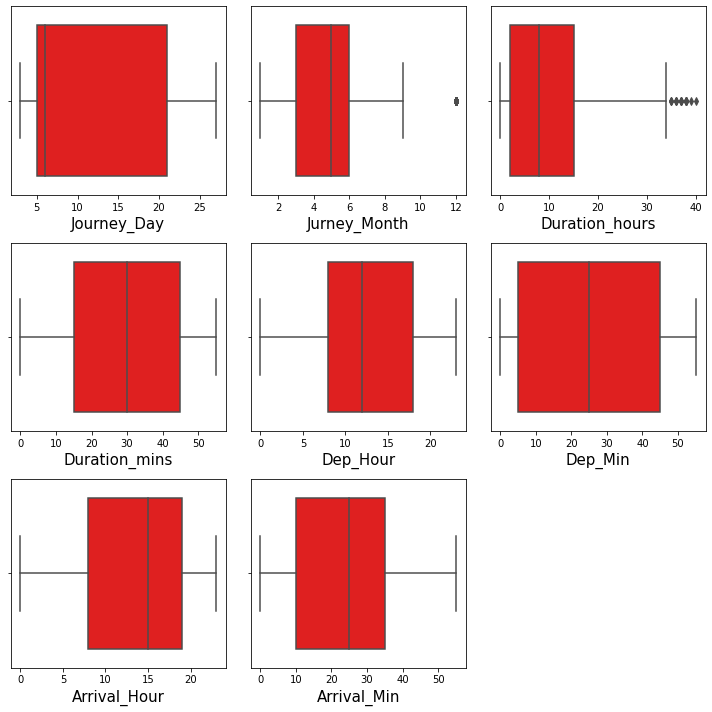

In [133]:
# Identifying the outliers using boxplot":

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(test_df[column],color="red")
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

### we can identify that Juorney Month and Duration Hours have outliers, let us remove the same using zsore.

# z-score for outliers:

In [134]:
# Feature containing outliers
feature = test_df[['Duration_hours','Jurney_Month']]

# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature))

z

,Duration_hours,Jurney_Month
0,0.022537,0.129089
1,0.737750,2.101227
2,1.527090,0.199601
3,0.335069,0.199601
4,0.976154,0.129089
...,...,...
2666,1.527090,0.129089
2667,0.976154,0.856981
2668,0.499346,0.129089
2669,0.573473,0.129089


In [135]:
# Creating new dataframe
new_test_df = test_df[(z<3).all(axis=1)] 
new_test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Jurney_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No Info,5,12,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No Info,24,6,2,50,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No Info,6,6,23,55,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No Info,27,3,2,35,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,3,6,6,35,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No Info,3,6,15,15,4,0,19,15


In [136]:
# Chech the % of data loss
# Shape of original dataset
test_df.shape

(2671, 14)

In [137]:
# Shape of new dataframe
new_test_df.shape

(2653, 14)

In [138]:
# Checking the the data loss
data_loss = (2671-2653)/2671*100
data_loss

0.6739049045301385

### Only 0.67% of data is lost , which we can afford.

# skewness:

In [140]:
# Checking the skewness
new_test_df.skew()

Journey_Day       0.475210
Jurney_Month      0.591565
Duration_hours    0.795392
Duration_mins    -0.110629
Dep_Hour          0.083357
Dep_Min           0.132681
Arrival_Hour     -0.432551
Arrival_Min       0.110111
dtype: float64

### Duration of Hours and Journey _Month have little skewness. it will not affect to much but let us remove the same using log mentod

In [141]:
new_test_df["Duration_hours"] = np.log1p(new_test_df["Duration_hours"])
new_test_df["Jurney_Month"] = np.log1p(new_test_df["Jurney_Month"])

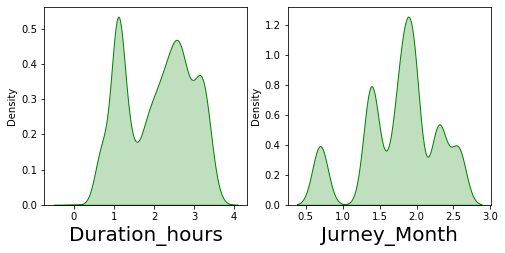

In [142]:
# Checking how the data has been distributed after removing the skewness
skew = ["Duration_hours","Jurney_Month"]
plt.figure(figsize=(8,8), facecolor='white')
plotnumber = 1

for column in new_test_df[skew]:
    if plotnumber<=2:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(new_test_df[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [143]:
new_test_df.skew()

Journey_Day       0.475210
Jurney_Month     -0.541053
Duration_hours   -0.134743
Duration_mins    -0.110629
Dep_Hour          0.083357
Dep_Min           0.132681
Arrival_Hour     -0.432551
Arrival_Min       0.110111
dtype: float64

### the Skewness have been reduced...

# Encoding data:

### label encoder:

In [144]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_test_df[categorical_col]= new_test_df[categorical_col].apply(LE.fit_transform)
new_test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Jurney_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,4,2,1,76,0,4,6,1.945910,2.397895,55,17,30,4,25
1,3,3,0,65,0,4,5,2.564949,1.609438,0,6,20,10,20
2,4,2,1,76,0,3,21,1.791759,3.178054,45,19,15,19,0
3,5,2,1,76,0,4,21,1.791759,2.639057,0,8,0,21,0
4,0,0,2,16,4,4,24,1.945910,1.098612,50,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,51,0,4,6,1.945910,3.178054,55,20,30,20,25
2667,3,3,0,43,4,4,27,1.386294,1.098612,35,14,20,16,55
2668,4,2,1,76,0,4,3,1.945910,1.945910,35,21,50,4,25
2669,1,2,1,76,0,4,3,1.945910,2.772589,15,4,0,19,15


# DATA STANDARDIZATION:

In [145]:
scaler = StandardScaler()
new_test_df = pd.DataFrame(scaler.fit_transform(new_test_df), columns=new_test_df.columns)
new_test_df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Jurney_Month,Duration_hours,Duration_mins,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,0.233214,0.031440,-0.167242,0.804966,-0.791072,0.327568,-0.706193,0.344970,0.374141,1.583185,0.766320,0.272445,-1.354818,0.025591
1,-0.348833,0.873978,-1.175634,0.398570,-0.791072,0.327568,-0.823069,1.565339,-0.579376,-1.697747,-1.172433,-0.252462,-0.503215,-0.272182
2,0.233214,0.031440,-0.167242,0.804966,-0.791072,-1.989868,1.046954,0.041078,1.317622,0.986652,1.118821,-0.514916,0.774190,-1.463273
3,0.815260,0.031440,-0.167242,0.804966,-0.791072,0.327568,1.046954,0.041078,0.665790,-1.697747,-0.819933,-1.302277,1.058057,-1.463273
4,-2.094973,-1.653635,0.841150,-1.411740,1.429790,0.327568,1.397583,0.344970,-1.197140,1.284918,1.823822,1.584714,-1.638686,1.216682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2648,-1.512927,0.873978,-1.175634,-0.118662,-0.791072,0.327568,-0.706193,0.344970,1.317622,1.583185,1.295071,0.272445,0.916123,0.025591
2649,-0.348833,0.873978,-1.175634,-0.414222,1.429790,0.327568,1.748212,-0.758252,-1.197140,0.390119,0.237569,-0.252462,0.348388,1.812227
2650,0.233214,0.031440,-0.167242,0.804966,-0.791072,0.327568,-1.056822,0.344970,-0.172465,0.390119,1.471321,1.322260,-1.354818,0.025591
2651,-1.512927,0.031440,-0.167242,0.804966,-0.791072,0.327568,-1.056822,0.344970,0.827275,-0.802948,-1.524934,-1.302277,0.774190,-0.569955


In [146]:
# Now let us provide this data to our ,model and predict the price of flight
Test_Prediction=Model.predict(new_test_df)

In [147]:
Prediction = pd.DataFrame()
Prediction['Price']= Test_Prediction
Prediction

,Price
0,6862.595109
1,7180.054310
2,11834.810391
3,12434.285171
4,3692.749896
...,...
2648,8634.319714
2649,9488.733521
2650,8196.193383
2651,12668.160524


### this is the new predicted PRICE values of the flight.

## SAVING THE FILE:

In [148]:
#Save the same into CSV file
Prediction.to_csv("PredictedFlightPriceData.csv", index=False)

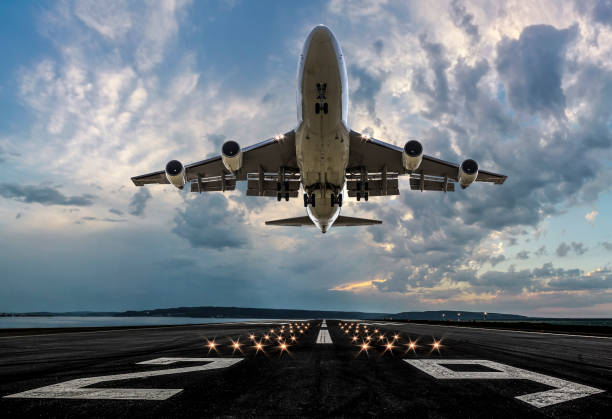

# READY TO TAKE OFFF!!!!!!!!!!!!!!!!!!